In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import pandas as pd
from omegaconf import OmegaConf
from pathlib import Path
from pprint import pprint
# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# mycode
from repo import REPO
from ml_utilities.output_loader.result_loader import SweepResult, JobResult
from ml_utilities.output_loader import create_job_output_loader
from ml_utilities.output_loader.plot import plot_sweep_summary, plot_data_log_values
from tflearning.mode_connectivity.instability_analysis import InstabilityAnalyzer
from tflearning.mode_connectivity.plot import plot_barriers, plot_instability, plot_distances

# 19-FashionMNIST Linear mode connectivity


In this notebook I run the instability analysis a la Frankle et al. [#1] on FMNIST for Conv4, Lenet and Resnet architectures. 
I do this because [#2] do their analysis also on FMNIST. I want to compare their findings with the results of the instability analysis. 

[#1] Frankle, Jonathan, Gintare Karolina Dziugaite, Daniel M. Roy, and Michael Carbin. 2020. “Linear Mode Connectivity and the Lottery Ticket Hypothesis.” arXiv. http://arxiv.org/abs/1912.05671.
[#2] Jastrzebski, Stanislaw, Maciej Szymczak, Stanislav Fort, Devansh Arpit, Jacek Tabor, Kyunghyun Cho*, and Krzysztof Geras*. 2022. “The Break-Even Point on Optimization Trajectories of Deep Neural Networks.” In . https://openreview.net/forum?id=r1g87C4KwB.



## 19.0 Conv4 Architecture

### With Batchnorm update

In [2]:
spec = 'fmnist-conv4-bnUpdateOn'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-B-fmnist-19.0.1-conv4--230127_093153'
insta = InstabilityAnalyzer.reload(sweep_result_dir=path, instability_folder_suffix='')

In [3]:
# load training jobs
sweepr = insta.instability_sweep
mainjob = insta.main_training_job

In [4]:
mainjob.get_summary(log_source='val', col_sel='Accuracy')

,best_train_step,best_val_score,Accuracy-train_step-8500,seed
IA-A-fmnist-19.0.1-conv4--230127_092855,8500,0.917,0.917,0


In [5]:
sweepr.get_summary()

,best_train_step,best_val_score,trainer.resume_training.checkpoint_idx,seed
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-0-seed-1--230127_093224,3500,0.916500,0,1
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-100-seed-1--230127_093223,3500,0.914000,100,1
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-1000-seed-1--230127_093219,9500,0.916500,1000,1
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-10000-seed-1--230127_093212,10000,0.917000,10000,1
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-15000-seed-1--230127_093224,15500,0.915333,15000,1
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-2000-seed-1--230127_093446,10500,0.919000,2000,1
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-250-seed-1--230127_093221,16500,0.916500,250,1
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-50-seed-1--230127_093216,17500,0.915667,50,1
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-500-seed-1--230127_093222,15500,0.917833,500,1
IA-B-fmnist-19.0.1-conv4--checkpoint_idx-5000-seed-1--230127_093208,10000,0.917833,5000,1


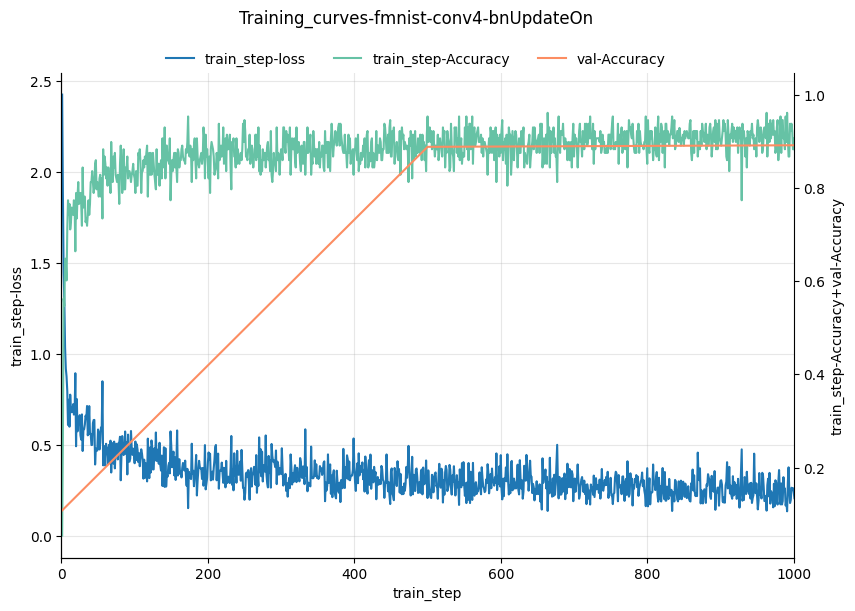

In [6]:
mj_dl = mainjob.get_data_log(['train_step', 'val'])
f = plot_data_log_values(mj_dl, y_axis_left=['train_step-loss'], y_axis_right=['train_step-Accuracy', 'val-Accuracy'], xlim=(0, 1000), x_axis='train_step', title=f'Training_curves-{spec}', savefig=True)

In [7]:
# df = insta.combined_results_dfs['datasets'].loc['default_params']
# df.style

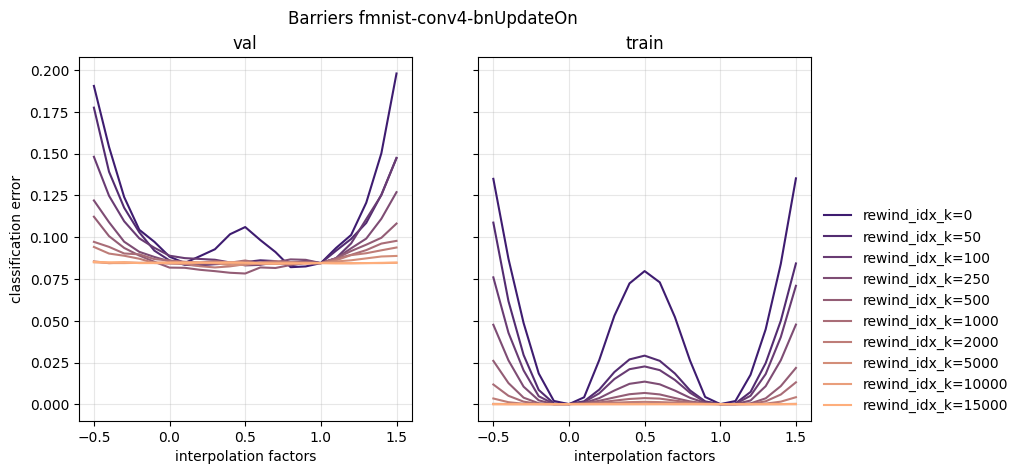

In [8]:
f = plot_barriers(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Barriers {spec}', save_format='png')

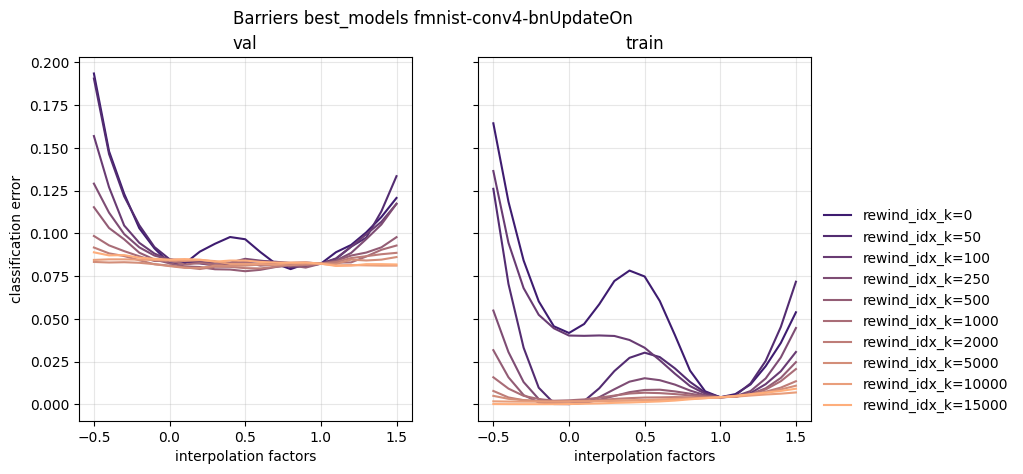

In [9]:
# This plot shows the interpolated values at the respective best models of the runs, we can see that there is not much of a difference between the best and the last models
f = plot_barriers(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Barriers best_models {spec}', save_format='', select_interpolate_at_idxes=0)

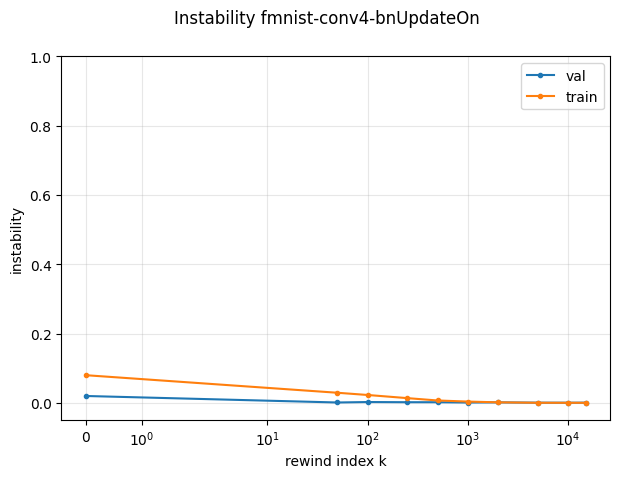

In [10]:
f = plot_instability(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Instability {spec}', x_scale='symlog', save_format='png')

In [11]:
df = insta.combined_results_dfs['distances'].loc['default_params']
df

distances                                                                             l2distance  \
init_model_idx_k job                                            seeds  model_idxes                 
0                IA-B-fmnist-19.0.1-conv4--checkpoint_idx-0     (1, 0) (3500, 8500)    31.313452   
                                                                       (24001, 24001)  37.145359   
50               IA-B-fmnist-19.0.1-conv4--checkpoint_idx-50    (1, 0) (17500, 8500)   28.315460   
                                                                       (24000, 24001)  28.510691   
100              IA-B-fmnist-19.0.1-conv4--checkpoint_idx-100   (1, 0) (3500, 8500)    22.909853   
                                                                       (24000, 24001)  26.556231   
250              IA-B-fmnist-19.0.1-conv4--checkpoint_idx-250   (1, 0) (16500, 8500)   22.904291   
                                                                       (24000, 24001)  23.066214   
500              IA-B-fmnist-19.0.1-conv4--checkpoint_idx-500   (1, 0) (15500, 8500)   19.713095   
                                                                       (24000, 24001)  19.852945   
1000             IA-B-fmnist-19.0.1-conv4--checkpoint_idx-1000  (1, 0) (9500, 8500)    16.927074   
                                                                       (24000, 24001)  17.167557   
2000             IA-B-fmnist-19.0.1-conv4--checkpoint_idx-2000  (1, 0) (10500, 8500)   12.989649   
                                                                       (24000, 24001)  13.085381   
5000             IA-B-fmnist-19.0.1-conv4--checkpoint_idx-5000  (1, 0) (10000, 8500)    7.696515   
                                                                       (24000, 24001)   7.434414   
10000            IA-B-fmnist-19.0.1-conv4--checkpoint_idx-10000 (1, 0) (10000, 8500)    0.759958   
                                                                       (24000, 24001)   0.263703   
15000            IA-B-fmnist-19.0.1-conv4--checkpoint_idx-15000 (1, 0) (15500, 8500)    2.040632   
                                                                       (24000, 24001)   0.129966   

distances                                                                             cosinesimilarity  
init_model_idx_k job                                            seeds  model_idxes                      
0                IA-B-fmnist-19.0.1-conv4--checkpoint_idx-0     (1, 0) (3500, 8500)           0.580066  
                                                                       (24001, 24001)         0.526391  
50               IA-B-fmnist-19.0.1-conv4--checkpoint_idx-50    (1, 0) (17500, 8500)          0.719989  
                                                                       (24000, 24001)         0.719746  
100              IA-B-fmnist-19.0.1-conv4--checkpoint_idx-100   (1, 0) (3500, 8500)           0.795549  
                                                                       (24000, 24001)         0.758083  
250              IA-B-fmnist-19.0.1-conv4--checkpoint_idx-250   (1, 0) (16500, 8500)          0.817288  
                                                                       (24000, 24001)         0.817044  
500              IA-B-fmnist-19.0.1-conv4--checkpoint_idx-500   (1, 0) (15500, 8500)          0.864300  
                                                                       (24000, 24001)         0.864223  
1000             IA-B-fmnist-19.0.1-conv4--checkpoint_idx-1000  (1, 0) (9500, 8500)           0.899460  
                                                                       (24000, 24001)         0.898872  
2000             IA-B-fmnist-19.0.1-conv4--checkpoint_idx-2000  (1, 0) (10500, 8500)          0.940882  
                                                                       (24000, 24001)         0.941235  
5000             IA-B-fmnist-19.0.1-conv4--checkpoint_idx-5000  (1, 0) (10000, 8500)          0.979248  
              

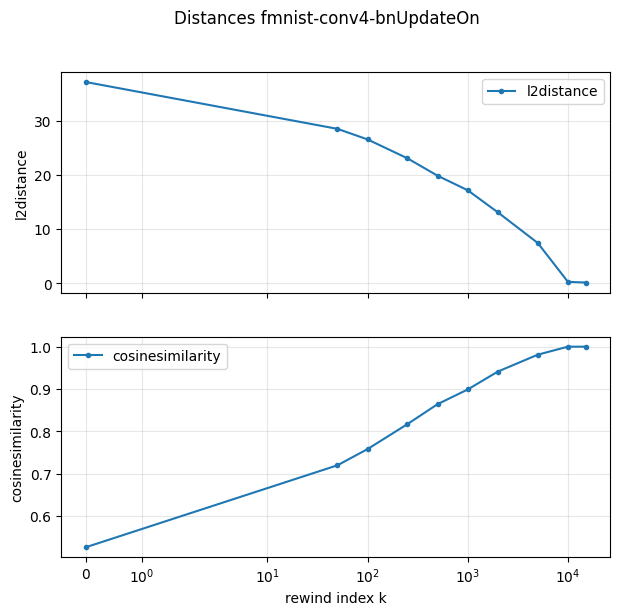

In [12]:
f = plot_distances(distances_df=insta.combined_results_dfs['distances'].loc['default_params'], title=f'Distances {spec}', save_format='png')

## Lenet

In [13]:
spec = 'fmnist-lenet'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-B-fmnist-19.1.0-lenet--230126_112324'
insta = InstabilityAnalyzer.reload(sweep_result_dir=path, instability_folder_suffix='')

In [14]:
# load training jobs
sweepr = insta.instability_sweep
mainjob = insta.main_training_job

In [15]:
mainjob.get_summary(log_source='val', col_sel='Accuracy')

,best_train_step,best_val_score,Accuracy-train_step-7000,seed
IA-A-fmnist-19.1.0-lenet--230126_112059,7000,0.903167,0.903167,0


In [16]:
sweepr.get_summary()

,best_train_step,best_val_score,trainer.resume_training.checkpoint_idx,seed
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-0-seed-1--230126_112621,7000,0.899833,0,1
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-100-seed-1--230126_112544,10000,0.900333,100,1
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-1000-seed-1--230126_112342,10500,0.901667,1000,1
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-10000-seed-1--230126_112338,15500,0.898833,10000,1
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-15000-seed-1--230126_112656,21500,0.899333,15000,1
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-2000-seed-1--230126_112702,7500,0.903000,2000,1
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-250-seed-1--230126_112343,4500,0.899500,250,1
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-50-seed-1--230126_112341,19500,0.901333,50,1
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-500-seed-1--230126_112344,22000,0.901833,500,1
IA-B-fmnist-19.1.0-lenet--checkpoint_idx-5000-seed-1--230126_112336,9500,0.900500,5000,1


In [17]:
# mainjob.get_data_log('val')

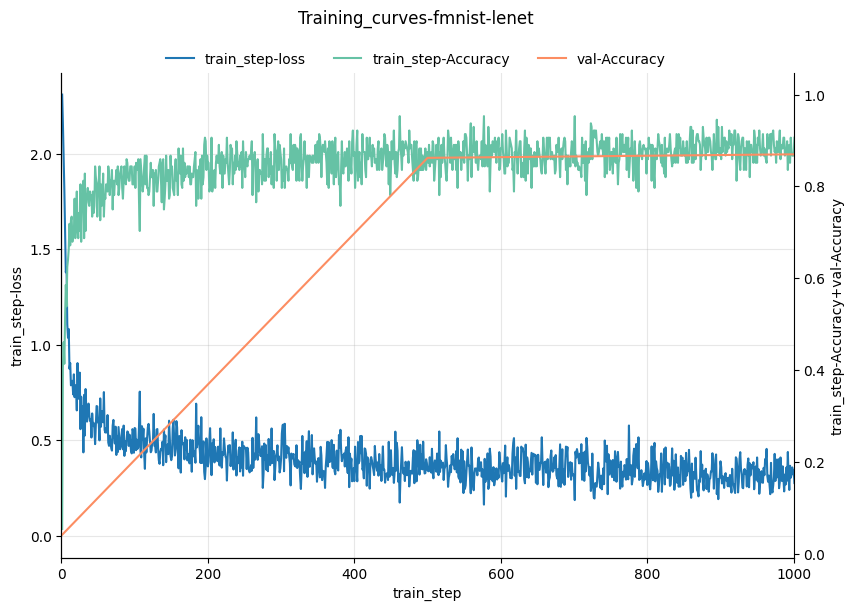

In [18]:
mj_dl = mainjob.get_data_log(['train_step', 'val'])
f = plot_data_log_values(mj_dl, y_axis_left=['train_step-loss'], y_axis_right=['train_step-Accuracy', 'val-Accuracy'], xlim=(0, 1000), x_axis='train_step', title=f'Training_curves-{spec}', savefig=True)

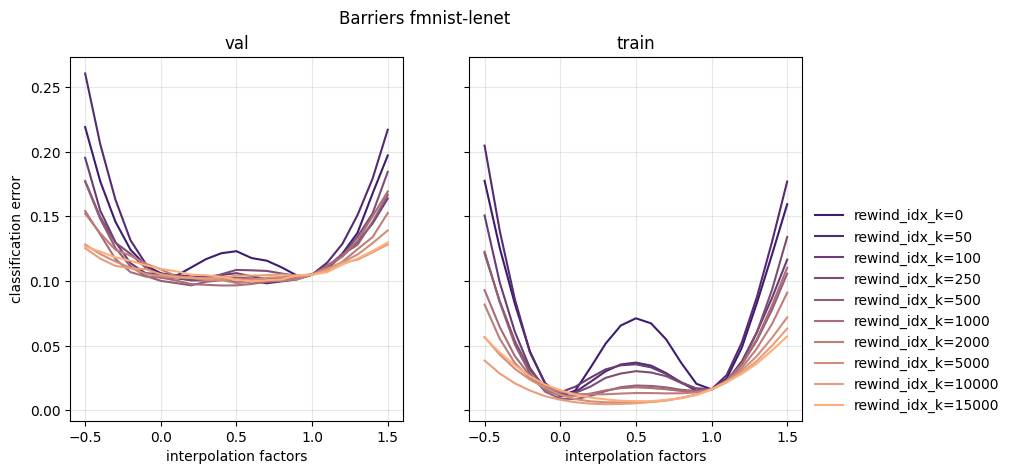

In [19]:
f = plot_barriers(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Barriers {spec}', save_format='png')

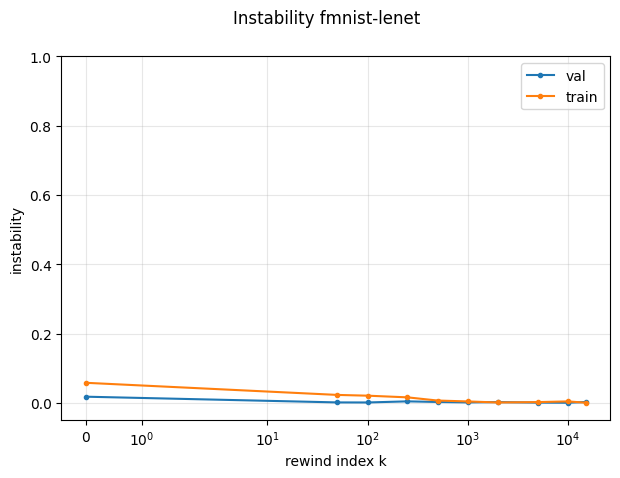

In [20]:
f = plot_instability(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Instability {spec}', x_scale='symlog', save_format='png')

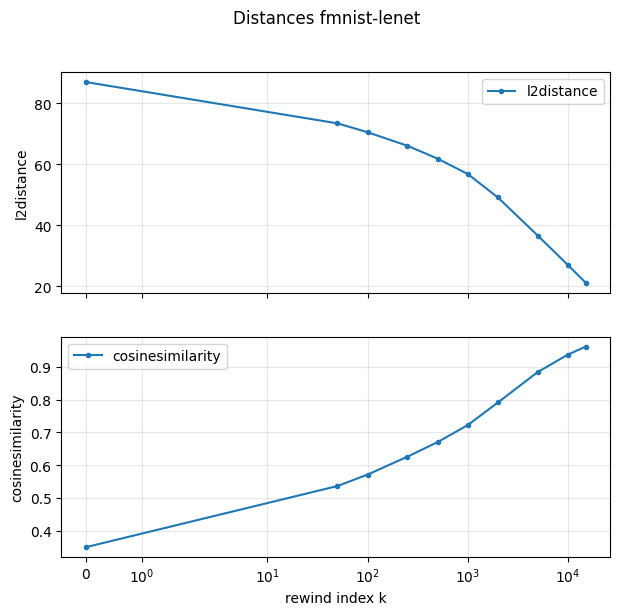

In [21]:
f = plot_distances(distances_df=insta.combined_results_dfs['distances'].loc['default_params'], title=f'Distances {spec}', save_format='png')

## Resnet

In [22]:
spec = 'fmnist-resnet-bnUpdateOn'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-B-fmnist-19.2.0-resnet--230126_165003'
insta = InstabilityAnalyzer.reload(sweep_result_dir=path, instability_folder_suffix='')

In [23]:
# load training jobs
sweepr = insta.instability_sweep
mainjob = insta.main_training_job

In [24]:
mainjob.get_summary(log_source='val', col_sel='Accuracy')

,best_train_step,best_val_score,Accuracy-train_step-9000,seed
IA-A-fmnist-19.2.0-resnet--230126_164140,9000,0.933,0.933,0


In [25]:
sweepr.get_summary()

,best_train_step,best_val_score,trainer.resume_training.checkpoint_idx,seed
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-0-seed-1--230126_165031,10000,0.929833,0,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-100-seed-1--230126_165030,9000,0.931500,100,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-1000-seed-1--230126_165026,23500,0.930000,1000,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-10000-seed-1--230126_165021,21000,0.932333,10000,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-15000-seed-1--230126_165818,19500,0.932333,15000,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-2000-seed-1--230126_170116,20000,0.929667,2000,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-250-seed-1--230126_165028,12500,0.931000,250,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-50-seed-1--230126_165024,18500,0.931833,50,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-500-seed-1--230126_165029,14500,0.931167,500,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-5000-seed-1--230126_165019,15000,0.933000,5000,1


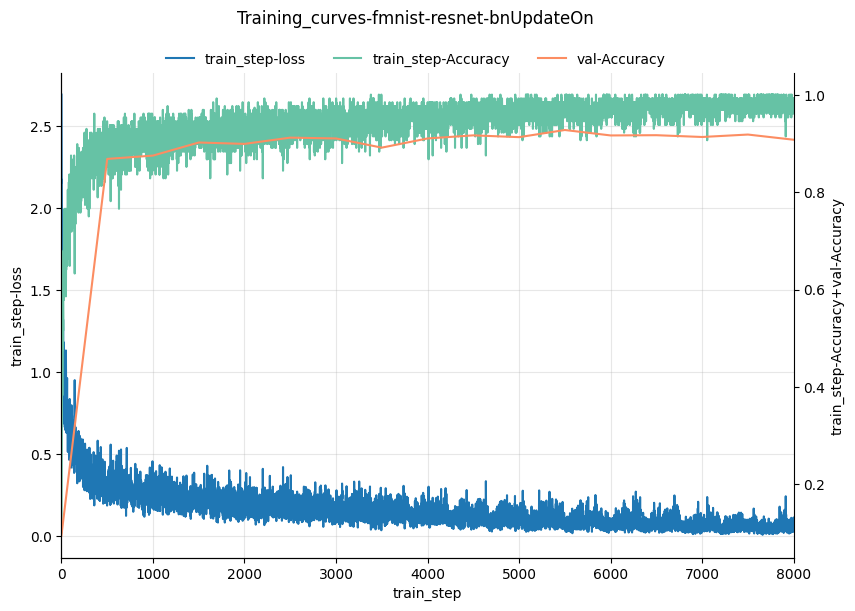

In [26]:
mj_dl = mainjob.get_data_log(['train_step', 'val'])
f = plot_data_log_values(mj_dl, y_axis_left=['train_step-loss'], y_axis_right=['train_step-Accuracy', 'val-Accuracy'], xlim=(0, 8000), x_axis='train_step', title=f'Training_curves-{spec}', savefig=True)

In [27]:
# df = insta.combined_results_dfs['datasets'].loc['default_params']
# df

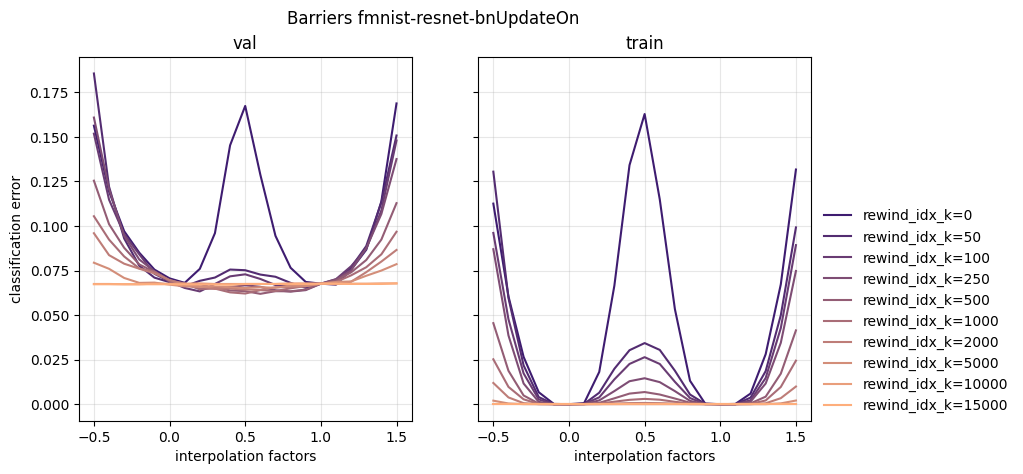

In [28]:
f = plot_barriers(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Barriers {spec}', save_format='png')

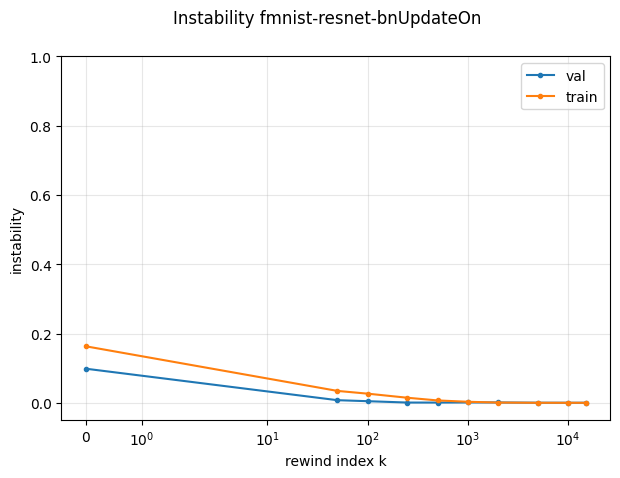

In [29]:
f = plot_instability(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Instability {spec}', x_scale='symlog', save_format='png')

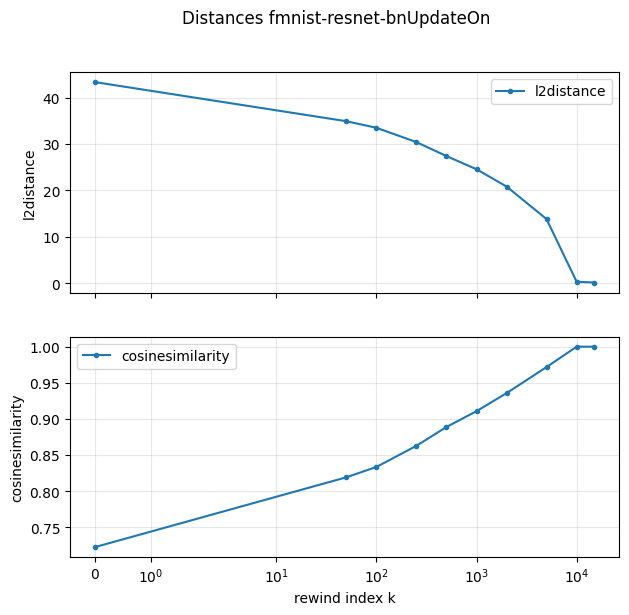

In [30]:
f = plot_distances(distances_df=insta.combined_results_dfs['distances'].loc['default_params'], title=f'Distances {spec}', save_format='png')

### Without Batchnorm update

In [31]:
spec = 'fmnist-resnet-bnUpdateOff'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-B-fmnist-19.2.0-resnet--230126_165003'
insta = InstabilityAnalyzer.reload(sweep_result_dir=path, instability_folder_suffix='no_bn_update')

In [32]:
# load training jobs
sweepr = insta.instability_sweep
mainjob = insta.main_training_job

In [33]:
mainjob.get_summary(log_source='val', col_sel='Accuracy')

,best_train_step,best_val_score,Accuracy-train_step-9000,seed
IA-A-fmnist-19.2.0-resnet--230126_164140,9000,0.933,0.933,0


In [34]:
sweepr.get_summary()

,best_train_step,best_val_score,trainer.resume_training.checkpoint_idx,seed
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-0-seed-1--230126_165031,10000,0.929833,0,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-100-seed-1--230126_165030,9000,0.931500,100,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-1000-seed-1--230126_165026,23500,0.930000,1000,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-10000-seed-1--230126_165021,21000,0.932333,10000,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-15000-seed-1--230126_165818,19500,0.932333,15000,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-2000-seed-1--230126_170116,20000,0.929667,2000,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-250-seed-1--230126_165028,12500,0.931000,250,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-50-seed-1--230126_165024,18500,0.931833,50,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-500-seed-1--230126_165029,14500,0.931167,500,1
IA-B-fmnist-19.2.0-resnet--checkpoint_idx-5000-seed-1--230126_165019,15000,0.933000,5000,1


In [35]:
# df = insta.combined_results_dfs['datasets'].loc['default_params']
# df

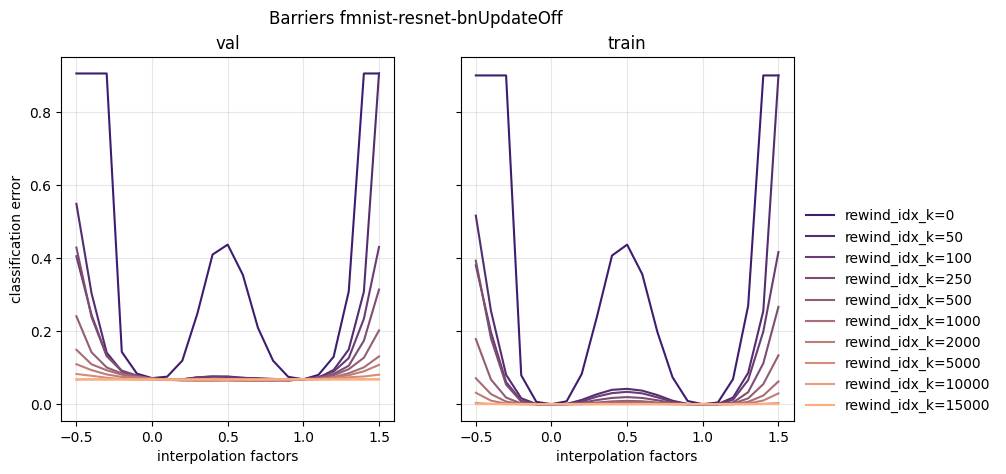

In [36]:
f = plot_barriers(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Barriers {spec}', save_format='png')

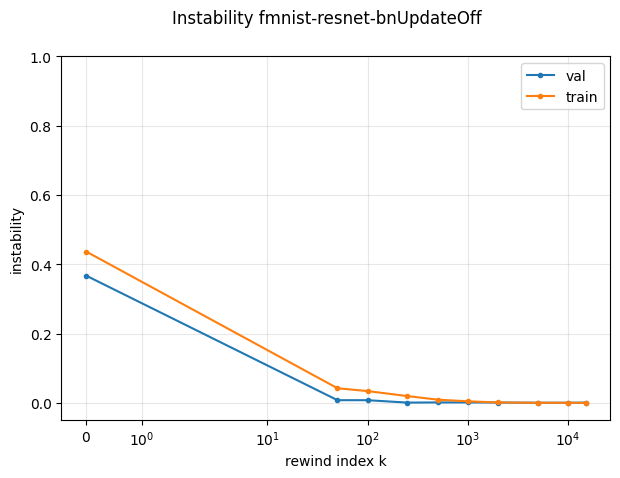

In [37]:
f = plot_instability(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Instability {spec}', x_scale='symlog', save_format='png')